<a href="https://colab.research.google.com/github/ziedtuihri/Data_Science_Projects/blob/mehdiy/garment_productivit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Garment productivit

# Importing Libraries

In [29]:

#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing Seaborn for statistical data visualization, built on top of Matplotlib.

import warnings
from rich import print



#regression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#-------------------------------------------------------------------------------------------------------------------------------

In [2]:
import matplotlib_inline.backend_inline

# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# Set max rows displayed for readability
#pd.set_option("display.max_rows", 6)

warnings.filterwarnings('ignore')

# Data Understanding




### Data Acquisition & Description

a. How was it collected?

This dataset includes important attributes of the garment manufacturing process, it it's sent by our professor in the university.

c. The datasets used for the analysis is

dataProductivity Prediction of Garment Employeese.csv in my github account exactly in the folder data.

<hr>

### Data Information
Importing Data Set

In [5]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/ziedtuihri/Data_Science_Projects/refs/heads/main/data/dataProductivity%20Prediction%20of%20Garment%20Employeese.csv",
    index_col=0,
)
df.head()


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
1/1/2015,Quarter1,sweing,Thursday,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,NaN,0.0,59.0,0.940725
1/1/2015,Quarter1,finishing,Thursday,1.0,0.75,3.94,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
1/1/2015,Quarter1,sweing,Thursday,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,12.0,0.80,11.41,NaN,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,6.0,NaN,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382


In [4]:
df.tail()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
3/3/2015,Quarter1,finishing,Tuesday,2.0,0.4,3.90,NaN,6300.0,0.0,0.0,0.0,0.0,15.0,0.567378
2/24/2015,Quarter4,finishing,Tuesday,9.0,0.7,2.90,NaN,1800.0,0.0,0.0,0.0,0.0,15.0,0.726933
2/14/2015,Quarter2,sweing,Saturday,11.0,0.6,11.41,1039.0,2280.0,23.0,0.0,0.0,NaN,55.0,0.600448
2/11/2015,Quarter2,finishing,Wednesday,12.0,0.8,4.08,NaN,1080.0,0.0,0.0,0.0,0.0,9.0,1.020000
2/25/2015,Quarter4,sweing,Wednesday,4.0,0.8,30.10,323.0,4080.0,50.0,0.0,0.0,1.0,59.0,0.800809


In [ ]:
print('Data Shape:', df.shape)

Data Shape:
(1302, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 1/1/2015 to 2/25/2015
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1279 non-null   object 
 1   department             1275 non-null   object 
 2   day                    1274 non-null   object 
 3   team                   1278 non-null   float64
 4   targeted_productivity  1279 non-null   float64
 5   smv                    1276 non-null   float64
 6   wip                    729 non-null    float64
 7   over_time              1276 non-null   float64
 8   incentive              1275 non-null   float64
 9   idle_time              1275 non-null   float64
 10  idle_men               1278 non-null   float64
 11  no_of_style_change     1279 non-null   float64
 12  no_of_workers          1280 non-null   float64
 13  actual_productivity    1267 non-null   float64
dtypes: float64(11), object(3)
memory usage: 184.9+ KB

In [6]:
#descriptive analytics
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1278.000000,1279.000000,1276.000000,729.000000,1276.000000,1275.000000,1275.000000,1278.000000,1279.000000,1280.000000,1267.000000
mean,6.443662,0.730274,15.061418,1148.422497,4551.332288,36.967843,0.688235,0.357590,0.146990,34.553906,0.734889
std,3.468331,0.096727,10.989957,1596.736245,3347.164546,155.419707,12.316019,3.191313,0.422717,22.256752,0.173802
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,762.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650173
50%,7.000000,0.750000,15.260000,1040.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.763375
75%,9.000000,0.800000,24.260000,1255.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850354
max,12.000000,0.800000,54.560000,21540.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


la moyenne de la productivite pour chaque departement

In [19]:
# Supprimer les lignes où 'department' est null
df = df.dropna(subset=['department'])

# Nettoyer et aligner le champ 'department'
df['department'] = df['department'].str.strip().str.upper()  # Exemple : supprimer les espaces et mettre en majuscules

# Calculer la moyenne de actual_productivity et targeted_productivity par département, en ignorant les nulls
average_productivity = df.groupby('department')[['actual_productivity', 'targeted_productivity']].mean().reset_index()

# Afficher le résultat
print(average_productivity)

department  actual_productivity  targeted_productivity
0  FINISHING             0.754129               0.738795
1     SWEING             0.720416               0.724092

La production actuel VS la production souhaité en fonction du quarter

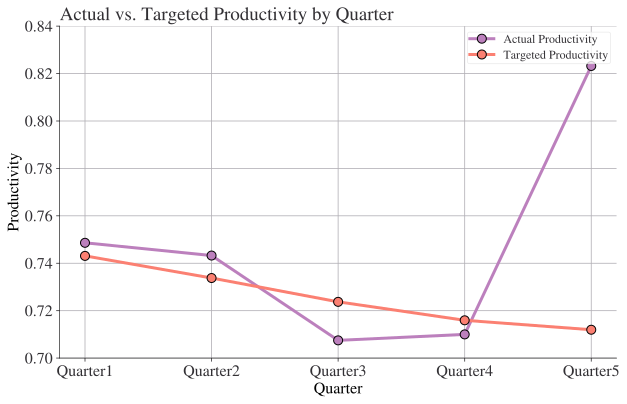

In [20]:
# Supprimer les lignes où 'department' ou 'quarter' est null
df = df.dropna(subset=['department', 'quarter'])

# Nettoyer et aligner le champ 'department'
df['department'] = df['department'].str.strip().str.upper()

# Calculer la moyenne de actual_productivity et targeted_productivity par trimestre
average_productivity_by_quarter = df.groupby('quarter')[['actual_productivity', 'targeted_productivity']].mean().reset_index()

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(average_productivity_by_quarter['quarter'], average_productivity_by_quarter['actual_productivity'], label='Actual Productivity', marker='o')
plt.plot(average_productivity_by_quarter['quarter'], average_productivity_by_quarter['targeted_productivity'], label='Targeted Productivity', marker='o')

# Ajouter des labels et un titre
plt.xlabel('Quarter')
plt.ylabel('Productivity')
plt.title('Actual vs. Targeted Productivity by Quarter')
plt.legend()
plt.grid(True)
plt.show()


Coefficient de détermination R^2: 0.266465192909786

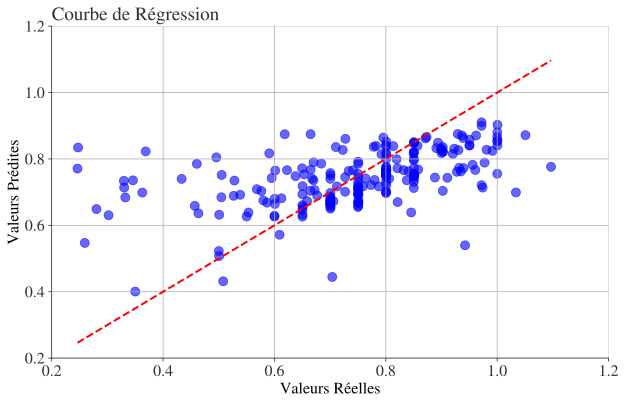

In [34]:
# Supprimer les lignes où 'actual_productivity' est null (notre variable cible)
df = df.dropna(subset=['actual_productivity'])

# Supprimer les lignes avec des valeurs nulles dans d'autres colonnes utilisées pour la prédiction
df = df.dropna(subset=['targeted_productivity', 'over_time', 'idle_time', 'no_of_workers'])

# Sélectionner les variables indépendantes et la variable cible
X = df[['quarter', 'department', 'team', 'targeted_productivity', 'over_time', 'idle_time', 'no_of_workers']]
y = df['actual_productivity']

# Définir les caractéristiques catégorielles et numériques
categorical_features = ['quarter', 'department', 'team']
numerical_features = ['targeted_productivity', 'over_time', 'idle_time', 'no_of_workers']

# Créer des pipelines pour le prétraitement
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))  # Encodage des variables catégorielles
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Imputation des valeurs manquantes
])

# Combiner les étapes de prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Créer le pipeline pour la régression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Étape de prétraitement
    ('regressor', LinearRegression())  # Modèle de régression linéaire
])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle avec le coefficient R^2
r2 = r2_score(y_test, y_pred)
print("Coefficient de détermination R^2:", r2)

# Visualiser la courbe de régression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ligne de référence
plt.title('Courbe de Régression')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.grid()
plt.show()